Ek olarak geçen hafta derste yapmamız gereken alıştırmanın linki: https://github.com/BusraSarikaya1/data/blob/main/week-6/6-example.ipynb

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Veri Setini Kaggle'dan aldım: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

In [2]:
df = pd.read_csv("housing.csv")

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west(Bir evin ne kadar batıda olduğunun ölçüsü; daha yüksek bir değer daha batıdadır)
2. latitude: A measure of how far north a house is; a higher value is farther north(Bir evin ne kadar kuzeyde olduğunun ölçüsü; daha yüksek bir değer daha kuzeydedir)
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building(Bir blok içindeki bir evin ortalama yaşı; daha düşük bir sayı daha yeni bir binadır)
4. totalRooms: Total number of rooms within a block(Bir bloktaki toplam oda sayısı)
5. totalBedrooms: Total number of bedrooms within a block(Bir bloktaki toplam yatak odası sayısı)
6. population: Total number of people residing within a block(Bir blokta ikamet eden toplam kişi sayısı)
7. households: Total number of households, a group of people residing within a home unit, for a block(Bir blok için, bir ev biriminde ikamet eden bir grup insandan oluşan toplam hane sayısı)
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)(Bir ev bloğundaki hanelerin ortalama geliri)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)(Bir blok içindeki haneler için medyan ev değeri)
10. oceanProximity: Location of the house w.r.t ocean/sea(Evin okyanusa/denize göre konumu)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
cdf = df[['housing_median_age','total_rooms','median_income','median_house_value']]

In [6]:
cdf.head(10)

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.3252,452600.0
1,21.0,7099.0,8.3014,358500.0
2,52.0,1467.0,7.2574,352100.0
3,52.0,1274.0,5.6431,341300.0
4,52.0,1627.0,3.8462,342200.0
5,52.0,919.0,4.0368,269700.0
6,52.0,2535.0,3.6591,299200.0
7,52.0,3104.0,3.1200,241400.0
8,42.0,2555.0,2.0804,226700.0
9,52.0,3549.0,3.6912,261100.0


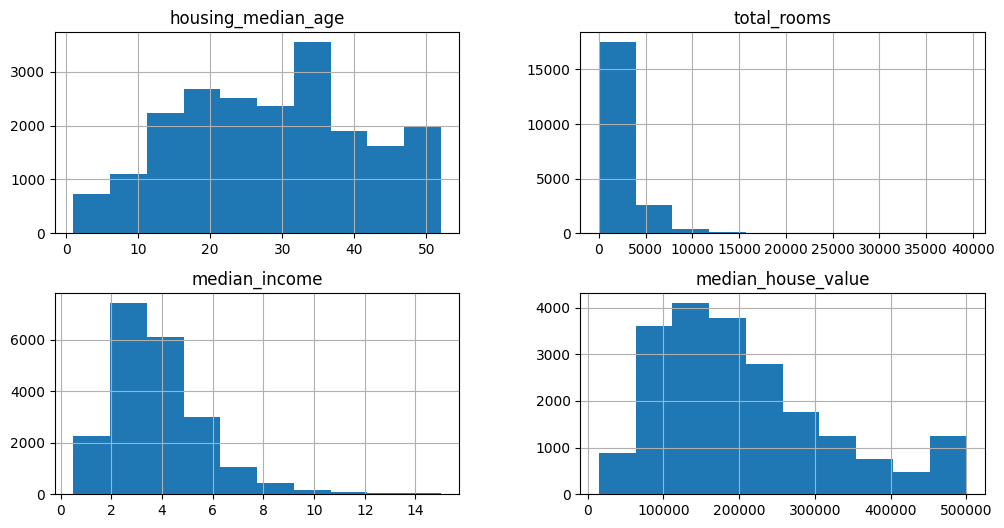

In [7]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['housing_median_age','total_rooms','median_income','median_house_value']]
viz.hist()
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

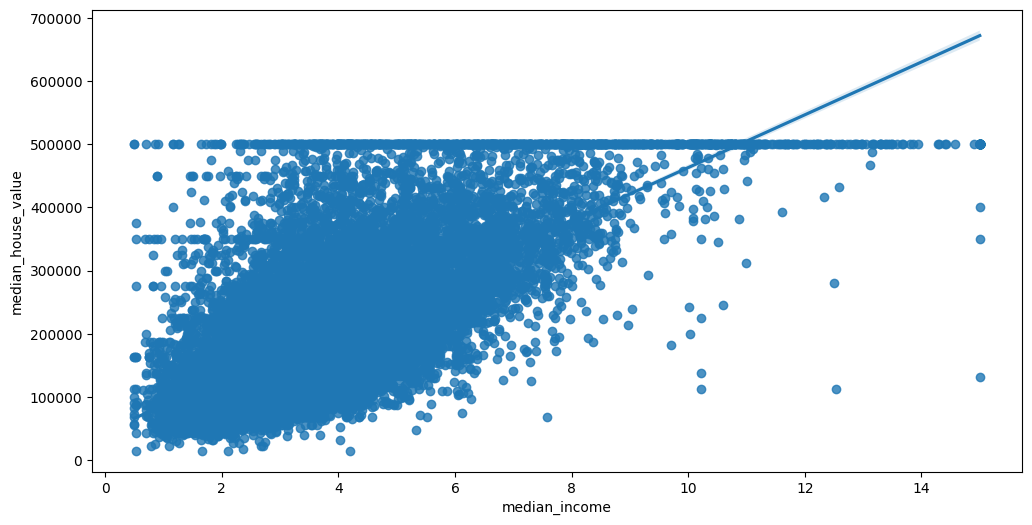

In [8]:
import seaborn as sns

sns.regplot(x=df['median_income'], y=df['median_house_value'])

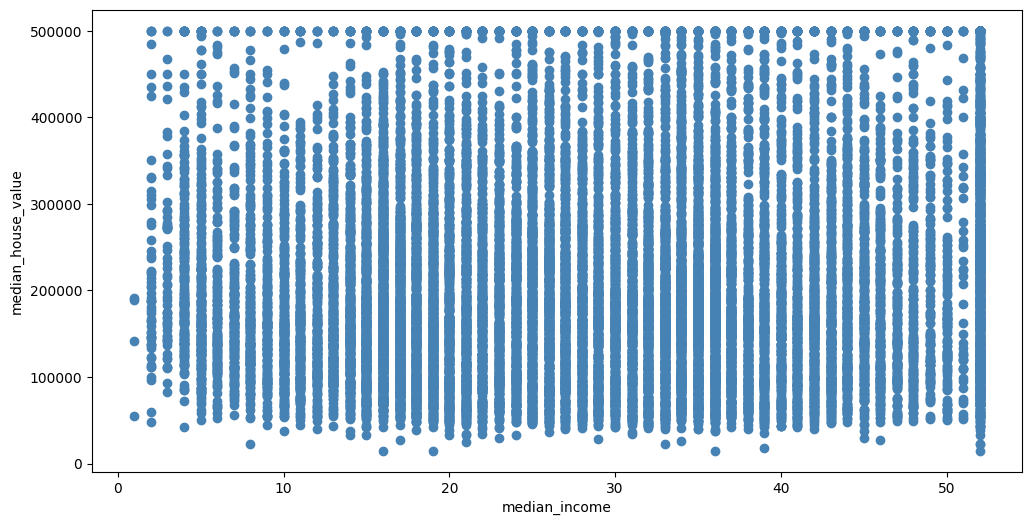

In [9]:
plt.scatter(cdf.housing_median_age, cdf.median_house_value, color="steelblue")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8   
train = cdf[msk]
test = cdf[~msk]

bu işlem, orijinal veri setini rastgele iki alt küme olan eğitim (train) ve test (test) setlerine böler. Genellikle makine öğrenimi modelinin eğitimi ve performansının değerlendirilmesi için kullanılır. Burada, %80'i eğitim setine, %20'si ise test setine ayrılmıştır.

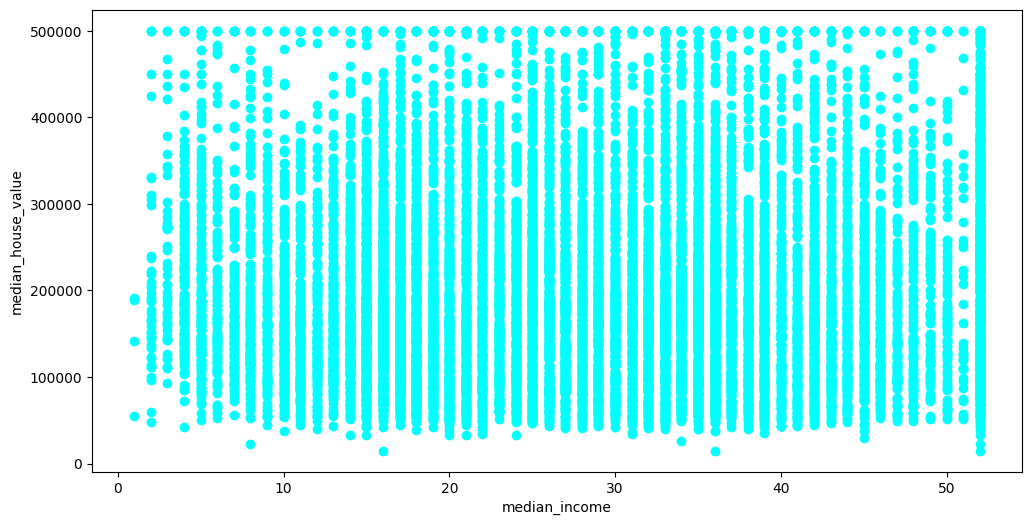

In [11]:
plt.scatter(train.housing_median_age, train.median_house_value, color="cyan")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

Bu şekilde scatter plot, evlerin ortanca yaşları ile ortanca değerleri arasındaki ilişkiyi görselleştirmek için kullanılmaktadır

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['median_income']])
train_y = np.asanyarray(train[['median_house_value']])

regr.fit(train_x, train_y)

LinearRegression()

Bu kod, median_income değişkeni ile median_house_value değişkeni arasındaki doğrusal ilişkiyi modellemek üzere bir doğrusal regresyon modeli oluşturur ve bu modeli eğitir. Eğitim tamamlandıktan sonra, bu modeli kullanarak tahminler yapababiliriz.

Formula:
median_house_value = m0 housing_median_age +b0
Bu formüle göre 
m0=regr.coef_
b0=regr.intercept_

In [14]:
print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[42051.28943924]]
[44150.72717993]


Text(0, 0.5, 'median_house_value')

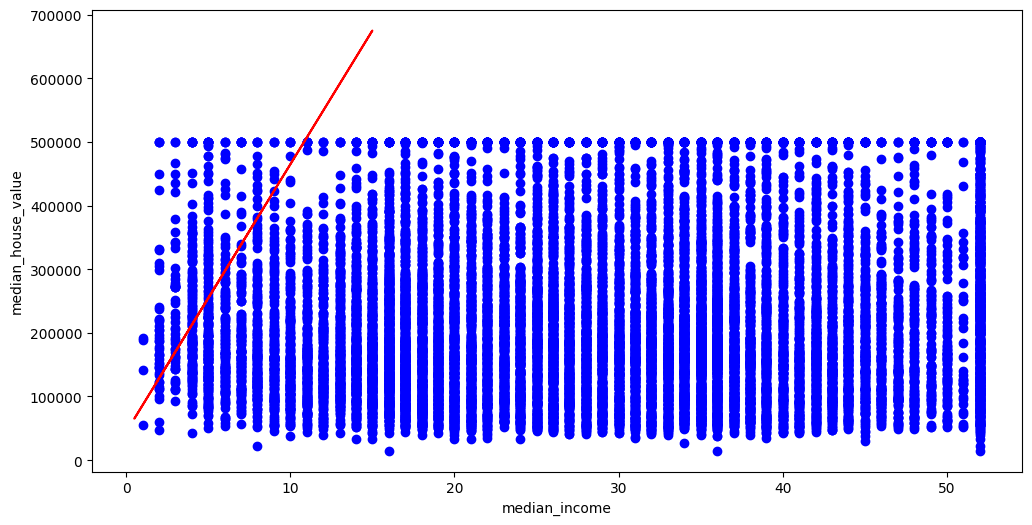

In [15]:
plt.scatter(train.housing_median_age, train.median_house_value, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("median_income")
plt.ylabel("median_house_value")

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['median_income']])
test_y = np.asanyarray(test[['median_house_value']])
test_y_ = regr.predict(test_x)

Bu kod, doğrusal regresyon modelinin test seti üzerindeki performansını değerlendirir ve bu performansı R-kare skoru ile ölçer.

In [17]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 64303.74
Residual sum of squares (MSE): 7395333505.73
R2-score: 0.44


Yukarıda çıkan sonuca göre modelin öngörülerinin gerçek değerlerden büyük sapmalar gösterdiğini ve modelin veriyi çokta açıklamadığını gösteriyor.

Multiple Lineer Regression Örneğine Bakalım

In [18]:
cdf.head()

,housing_median_age,total_rooms,median_income,median_house_value
0,41.0,880.0,8.3252,452600.0
1,21.0,7099.0,8.3014,358500.0
2,52.0,1467.0,7.2574,352100.0
3,52.0,1274.0,5.6431,341300.0
4,52.0,1627.0,3.8462,342200.0


formula
median_house_value = m0 housing_median_age + m1 total_rooms+ m2 median_income +b0

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['housing_median_age','total_rooms','median_income']])
y = np.asanyarray(train[['median_house_value']])

regr.fit(x, y)

LinearRegression()

In [20]:
print('Coefficients:', regr.coef_)

Coefficients: [[1.92156360e+03 3.94643403e+00 4.26480414e+04]]


In [21]:
y_hat = regr.predict(np.asanyarray(test[['housing_median_age','total_rooms','median_income']]))
x = np.asanyarray(test[['housing_median_age','total_rooms','median_income']])
y = np.asanyarray(test[['median_house_value']])

print("Mean Squared Error (MSE) : %.5f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 6746176768.76546
Variance score: 0.49141


Şimdi de 'total_rooms' değişkeni yerine 'population' ve	'households' bu değişkenleri eğitip test ediyoruz.

In [22]:
train['population'] = df['population']
train['households'] = df['households']

C:\Users\Asus\AppData\Local\Temp\ipykernel_11572\2825771306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['population'] = df['population']
C:\Users\Asus\AppData\Local\Temp\ipykernel_11572\2825771306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['households'] = df['households']


In [23]:
test['population'] = df['population']
test['households'] = df['households']

C:\Users\Asus\AppData\Local\Temp\ipykernel_11572\2538222582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['population'] = df['population']
C:\Users\Asus\AppData\Local\Temp\ipykernel_11572\2538222582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['households'] = df['households']


In [24]:
cdf = df[['housing_median_age','population','households','median_house_value']]

In [25]:
cdf.head()

,housing_median_age,population,households,median_house_value
0,41.0,322.0,126.0,452600.0
1,21.0,2401.0,1138.0,358500.0
2,52.0,496.0,177.0,352100.0
3,52.0,558.0,219.0,341300.0
4,52.0,565.0,259.0,342200.0


In [26]:
print(train.columns)

Index(['housing_median_age', 'total_rooms', 'median_income',
       'median_house_value', 'population', 'households'],
      dtype='object')


In [27]:
print(test.columns)

Index(['housing_median_age', 'total_rooms', 'median_income',
       'median_house_value', 'population', 'households'],
      dtype='object')


In [28]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['housing_median_age','population','households','median_income']])
y = np.asanyarray(train[['median_house_value']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.95369304e+03 -4.24813674e+01  1.50073593e+02  4.32818590e+04]]


In [29]:
y_= regr.predict(np.asanyarray(test[['housing_median_age','population','households','median_income']]))
x = np.asanyarray(test[['housing_median_age','population','households','median_income']])
y = np.asanyarray(test[['median_house_value']])
print("Mean Squared Error (MSE): %.5f"% np.mean((y_ - y) ** 2))
print('Variance score: %.5f' % regr.score(x, y))

Mean Squared Error (MSE): 6158113967.24131
Variance score: 0.53574


1)Bağımsız değişkenlerimiz bu değerlerken:'housing_median_age','total_rooms','median_income'
Mean Squared Error (MSE) : 6612144431.96626
Variance score: 0.49666

2)Bağımsız değişkenlerimiz bu değerlerken : 'housing_median_age','population','households','median_income'
Mean Squared Error (MSE): 5771343597.05199
Variance score: 0.56819

Sonuca bakılırsa modelimiz iyileşmeye gitmiştir.

grafikte ekleyelim.